In [54]:
import pandas as pd
import numpy as np
import seaborn as scs

In [55]:
df = pd.read_csv("../ml_datasets/fruits.csv")

In [56]:
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [57]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()
mm = MinMaxScaler()
df['Class'] = le.fit_transform(df['Class'])
df['Weight'] = mm.fit_transform(df[['Weight']])
df['Size'] = mm.fit_transform(df[['Size']])
df.head()

,Weight,Size,Class
0,0.4,0.206522,1
1,0.4,0.108696,1
2,0.0,0.043478,1
3,0.7,1.000000,0
4,0.2,0.375000,1


In [58]:
from sklearn.model_selection import train_test_split 
x = df[['Weight', 'Size']]
y = df['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1, shuffle=True)

## Linear SVM

In [59]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=1)
clf.fit(xtrain, ytrain)

LinearSVC(C=1)

In [60]:
ypred = clf.predict(xtest)

In [61]:
clf.coef_, clf.intercept_

(array([[-1.25465593, -1.74109856]]), array([1.48106107]))

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

1.0

In [63]:
print(clf.score(xtrain, ytrain))
print(clf.score(xtest, ytest))

1.0
1.0


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


<Axes: >

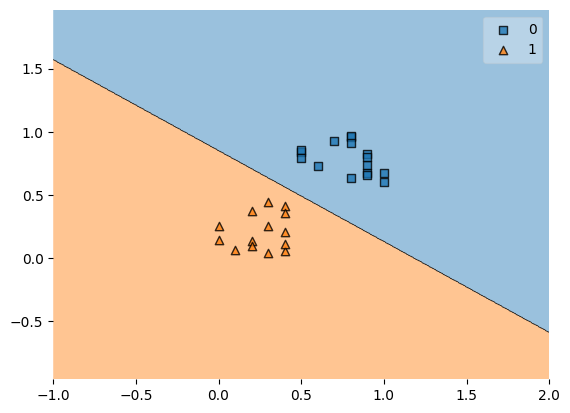

In [64]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(xtrain), np.array(ytrain), clf)

## Linear SVM with SVC

In [65]:
from sklearn.svm import SVC
# ["linear", "rbf", "polynomial"]
# clf = SVC(kernel="linear") 
clf = SVC() 
clf.fit(xtrain, ytrain)
clf.support_vectors_

array([[0.6       , 0.72826087],
       [1.        , 0.59782609],
       [0.5       , 0.79347826],
       [0.4       , 0.4076087 ],
       [0.4       , 0.05434783],
       [0.3       , 0.44565217],
       [0.        , 0.14130435]])

In [66]:
ypred = clf.predict(xtest)
accuracy_score(ytest, ypred)

1.0

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

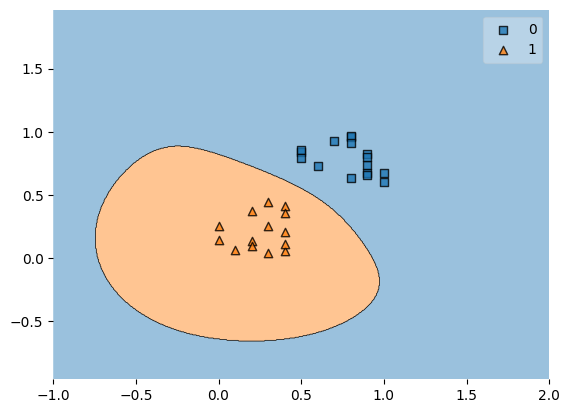

In [67]:
plot_decision_regions(np.array(xtrain), np.array(ytrain), clf)

In [68]:
clf1 = SVC(kernel="linear").fit(xtrain,ytrain) 
clf2 = SVC(kernel="poly", degree=2).fit(xtrain,ytrain)  
clf3 = SVC(kernel="sigmoid").fit(xtrain,ytrain)  

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

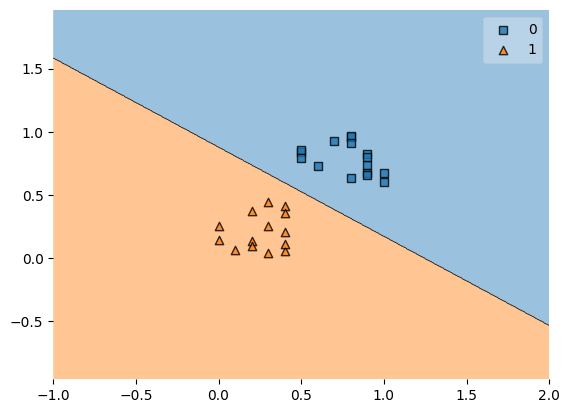

In [69]:
plot_decision_regions(np.array(xtrain), np.array(ytrain), clf1)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

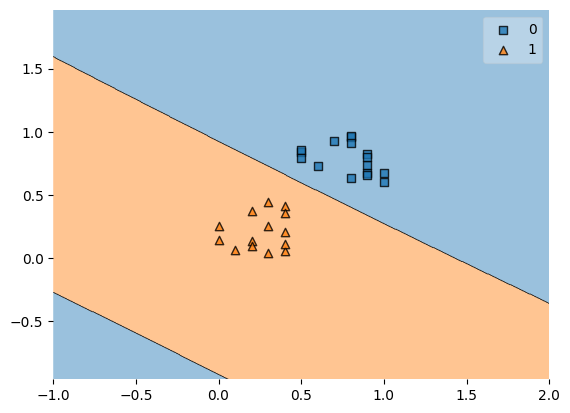

In [70]:
plot_decision_regions(np.array(xtrain), np.array(ytrain), clf2)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

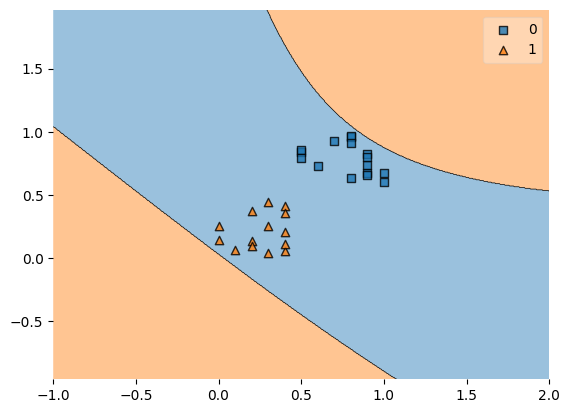

In [71]:
plot_decision_regions(np.array(xtrain), np.array(ytrain), clf3)

In [72]:
df = pd.read_csv("../ml_datasets/BMI.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [73]:
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [74]:
df['Height'] = mm.fit_transform(df[['Height']])
df['Weight'] = mm.fit_transform(df[['Weight']])
df.head()

,Gender,Height,Weight,Index
0,1,0.576271,0.418182,4
1,1,0.830508,0.336364,2
2,0,0.762712,0.545455,4
3,0,0.932203,0.490909,3
4,1,0.152542,0.100000,3


In [75]:
x = df.iloc[:, 1:3]
y = df['Index']

In [76]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1, shuffle=True)

In [77]:
clf = SVC(kernel="rbf", degree=2)
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
accuracy_score(ytest, ypred)

0.912

In [78]:
clf.score(xtrain, ytrain), clf.score(xtest, ytest)

(0.9093333333333333, 0.912)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

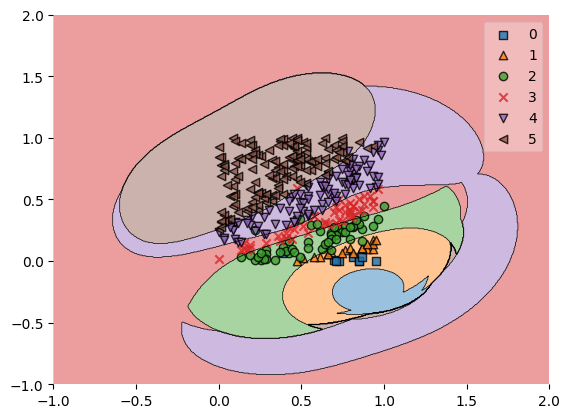

In [79]:
plot_decision_regions(np.array(xtrain), np.array(ytrain), clf)

### Try 3d visualization

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Grid Search CV

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
grid_value = {
    'kernel' : ['linear', 'rbf'],
    'C' : [0.001, 0.01, 1, 10, 100],
    'gamma' : ['auto', 'scale']
}

best_clf = GridSearchCV(clf, param_grid=grid_value, scoring='accuracy', cv=5)

In [83]:
best_clf.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=SVC(degree=2),
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [84]:
best_clf.best_estimator_

SVC(C=100, degree=2, gamma='auto', kernel='linear')

In [85]:
best_clf.score(xtrain, ytrain)

0.96

In [86]:
best_clf.score(xtest, ytest)

0.968

## GridSearchCV in Regression

In [100]:
x = df[['Index','Gender', 'Height']]
y = df['Weight']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=1, shuffle=True)

In [101]:
from sklearn.svm import SVR
clf = SVR()

In [102]:
grid_value = {
    'kernel' : ['linear', 'rbf', 'poly'],
    'C' : [0.001, 0.01, 1, 10, 100],
}

best_clf = GridSearchCV(clf, param_grid=grid_value, scoring='r2', cv=5)

In [103]:
best_clf.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='r2')

In [104]:
best_clf.score(xtest,ytest)

0.8203391821355538

In [105]:
best_clf.score(xtrain,ytrain)

0.8365182294890594

In [106]:
best_clf.best_estimator_

SVR(C=10)